<div class="alert alert-block alert-success">
    
 # Berkeley- PCMLAI: Module 1
    
 👨‍🏫 **Vikesh K**      
 #️⃣ **OH-01**
  

</div>

# Case Study: Prioritise Product Development work

![grubhub.png](attachment:grubhub.png)


Given the below data which state should we focus our only available product development team on?

Respond with your answer and reasoning. Where you don't have enough data to make a decision, make assumptions and list
them in your response.

**Data Dictionary**

- `total_orders`: online food orders placed on grubhub.com
- `visits`:  the number of unique times people have gone to grubhub.com
- `revenue`: the amount of money we are making

**Company Details**

Grubhub is a part of Just Eat Takeaway.com, a leading global online food delivery marketplace, and features more than 365,000 restaurant partners in over 4,000 U.S. cities.

![image.png](attachment:image.png)

## Loading Module and Data Set


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/online_orders.csv'

**Import the dataset as it is**

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,date,state,total_orders,revenue,visits
0,1/1/2014,CA,411,10369.53,17633
1,1/2/2014,CA,347,8754.81,15949
2,1/3/2014,CA,522,13170.06,11731
3,1/4/2014,CA,635,16021.05,16728
4,1/5/2014,CA,214,5399.22,12570


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          724 non-null    object 
 1   state         724 non-null    object 
 2   total_orders  724 non-null    int64  
 3   revenue       724 non-null    float64
 4   visits        724 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 28.4+ KB


**Import the dataset with right formatting**

In [ ]:
df = pd.read_csv(url, parse_dates= ['date'], )

In [ ]:
df.head()

,date,state,total_orders,revenue,visits
0,2014-01-01,CA,411,10369.53,17633
1,2014-01-02,CA,347,8754.81,15949
2,2014-01-03,CA,522,13170.06,11731
3,2014-01-04,CA,635,16021.05,16728
4,2014-01-05,CA,214,5399.22,12570


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          724 non-null    datetime64[ns]
 1   state         724 non-null    object        
 2   total_orders  724 non-null    int64         
 3   revenue       724 non-null    float64       
 4   visits        724 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 28.4+ KB


In [ ]:
df.shape

(724, 5)

## Data check

**Missing Values**

In [ ]:
df.isna().sum()

,0
date,0
state,0
total_orders,0
revenue,0
visits,0


In [ ]:
df.isna().mean()

,0
date,0.00
state,0.00
total_orders,0.00
revenue,0.00
visits,0.00


**Duplicated**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['date', 'state', 'total_orders', 'revenue', 'visits'], dtype='object')

## EDA

**Column wise summary**

In [ ]:
df.describe()

,date,total_orders,revenue,visits
count,724,724.00,724.00,724.00
mean,2014-04-01 00:00:00,13369.91,2501466.84,787544.31
min,2014-01-01 00:00:00,164.00,4137.72,4156.00
25%,2014-02-15 00:00:00,1372.25,31095.49,36552.50
50%,2014-04-01 00:00:00,12710.00,433479.68,156642.00
75%,2014-05-16 00:00:00,20807.75,4200262.56,846030.25
max,2014-06-30 00:00:00,44035.00,16056648.30,6868946.00
std,NaN,10530.68,3486169.20,1270341.97


**Get info on percentile values**

In [ ]:
df.describe([0.10,.25 ,.80, .85, 0.90, 0.95, 0.99 ])

,date,total_orders,revenue,visits
count,724,724.00,724.00,724.00
mean,2014-04-01 00:00:00,13369.91,2501466.84,787544.31
min,2014-01-01 00:00:00,164.00,4137.72,4156.00
10%,2014-01-19 00:00:00,522.90,13192.77,16900.00
25%,2014-02-15 00:00:00,1372.25,31095.49,36552.50
50%,2014-04-01 00:00:00,12710.00,433479.68,156642.00
80%,2014-05-25 00:00:00,22916.00,5412817.09,1744855.20
85%,2014-06-03 00:00:00,25538.75,6602219.08,2173188.85
90%,2014-06-12 00:00:00,28004.60,8200203.02,2784035.50
95%,2014-06-21 00:00:00,32469.15,10292277.93,3505927.95


In [ ]:
df.describe(include = 'O')

,state
count,724
unique,4
top,CA
freq,181


## Understanding of the numbers

In [ ]:
df[['revenue', 'visits']].sum()

,0
revenue,1811061989.04
visits,570182080.00


In [ ]:
df.groupby("state")[['revenue', 'visits']].sum()

,revenue,visits
state,,
CA,2594299.98,3603418
IA,1388743780.40,489594378
IL,44403778.32,21446435
NYC,375320130.34,55537849


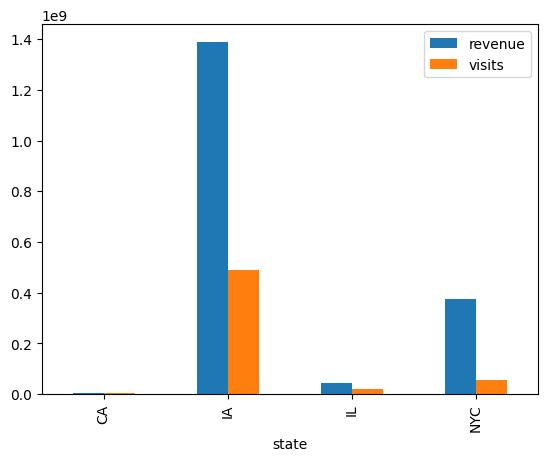

In [ ]:
df.groupby("state")[['revenue', 'visits']].sum().plot(kind = "bar");

### Visual understanding

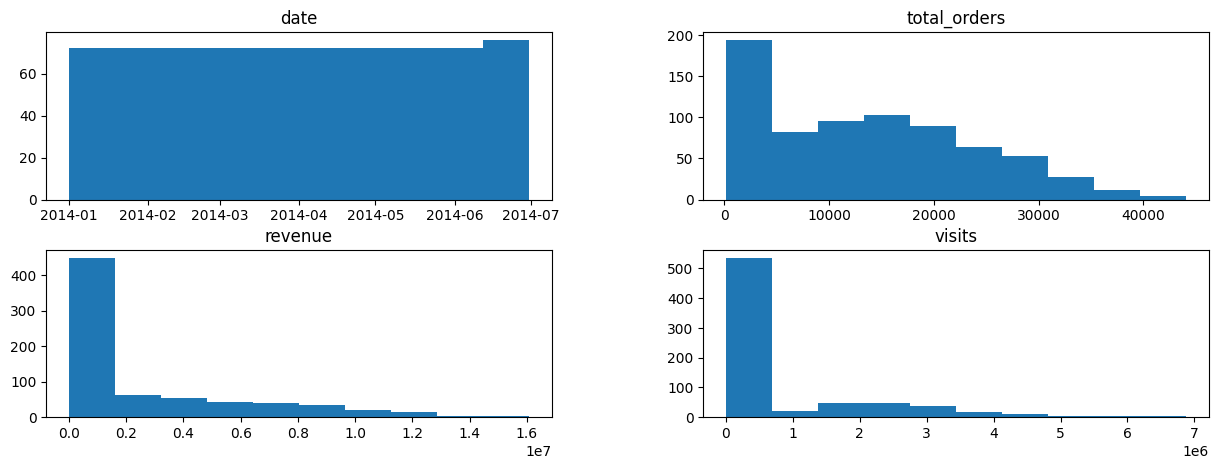

In [ ]:
df.hist(grid = False, figsize= (15,5));

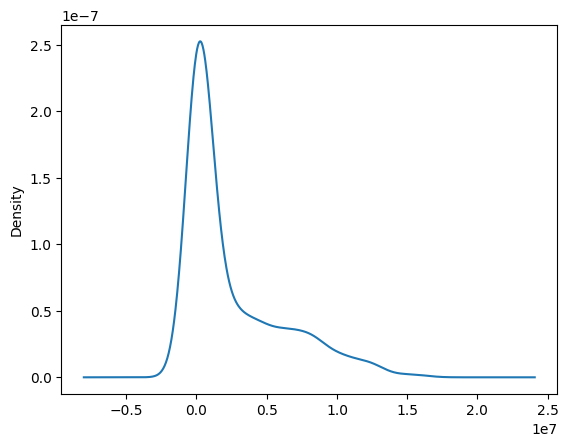

In [ ]:
df['revenue'].plot(kind = "kde");

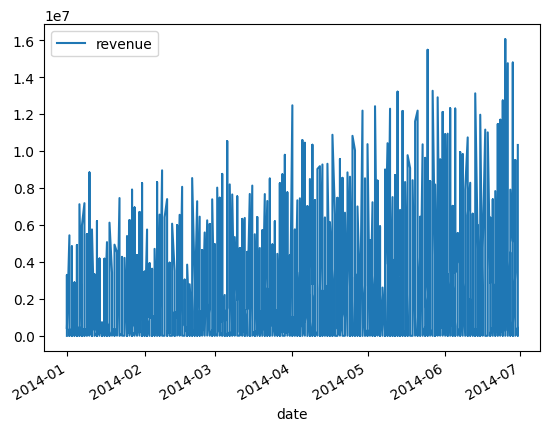

In [ ]:
df.plot(kind = "line", x = "date", y = "revenue");

In [ ]:
state_list = df['state'].unique().tolist()
state_list

['CA', 'IL', 'NYC', 'IA']

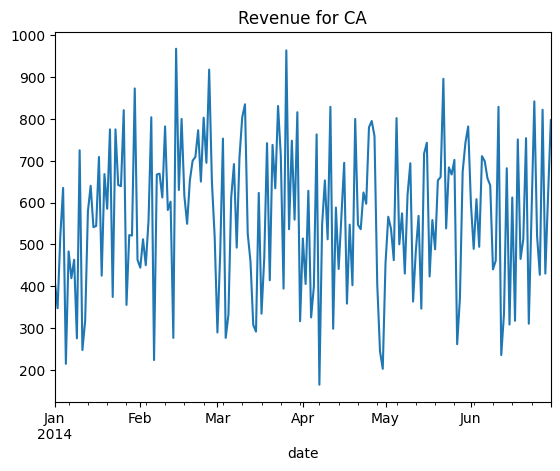

----------------------------------------------------------------------------------------------------


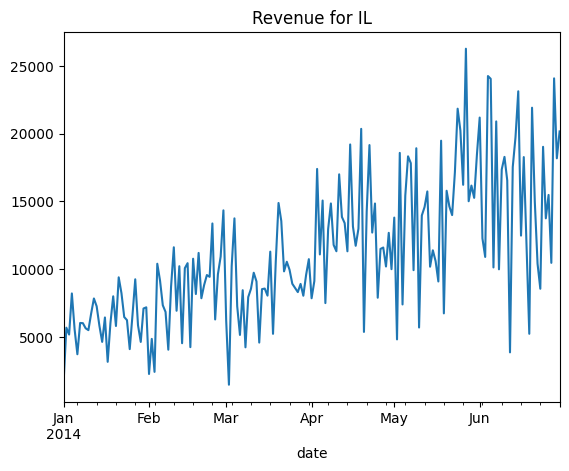

----------------------------------------------------------------------------------------------------


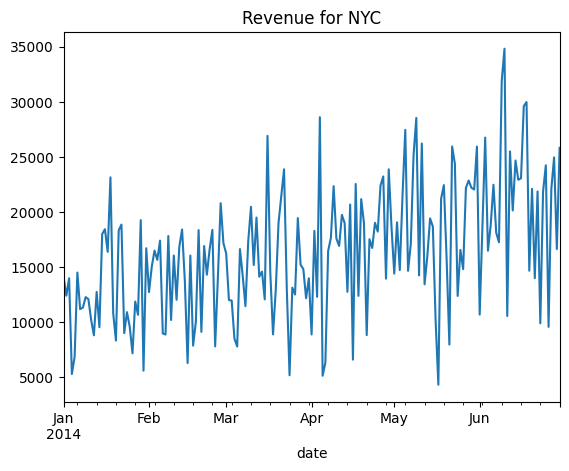

----------------------------------------------------------------------------------------------------


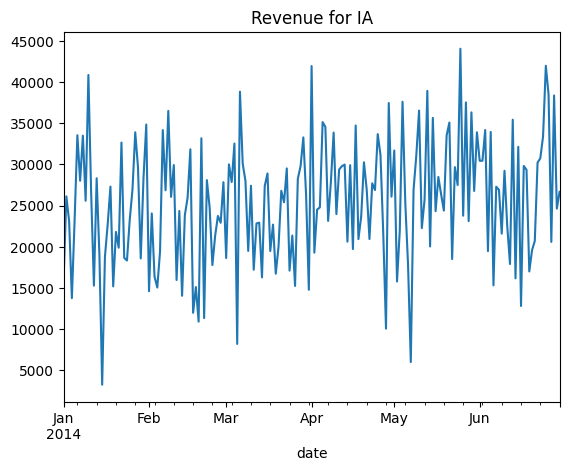

----------------------------------------------------------------------------------------------------


In [ ]:
for state in state_list:
    df.query('state == @state ').plot(kind = "line", x = "date", y = "total_orders", title = f"Revenue for {state}", legend = False)
    plt.show() # this ensures that the output is in sequence
    print("-"*100)

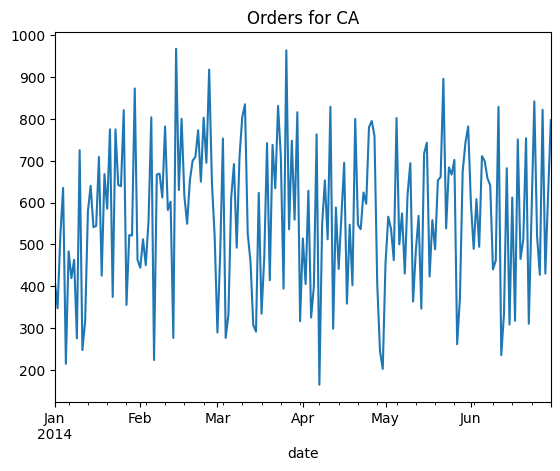

----------------------------------------------------------------------------------------------------


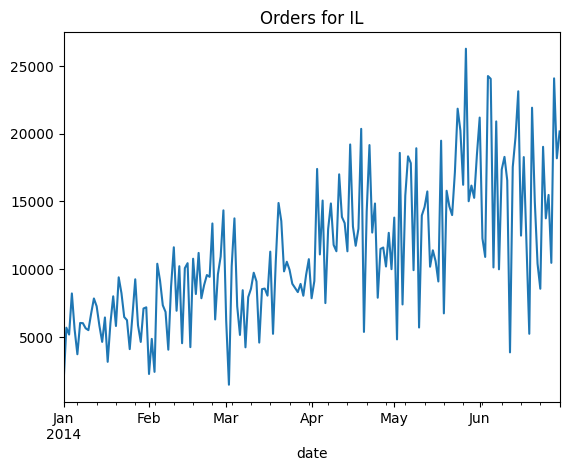

----------------------------------------------------------------------------------------------------


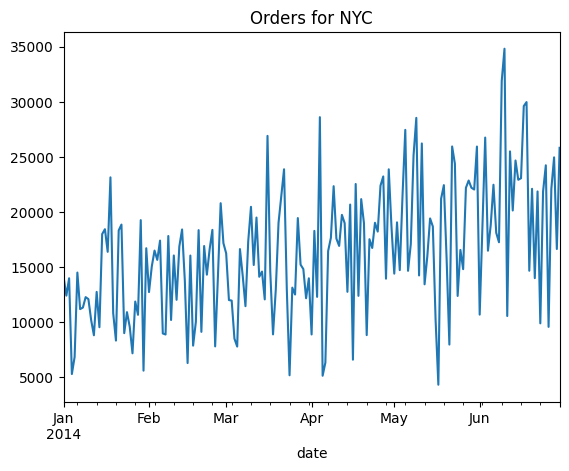

----------------------------------------------------------------------------------------------------


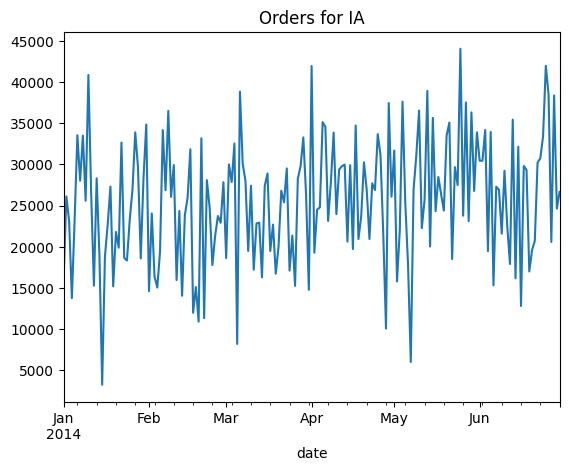

----------------------------------------------------------------------------------------------------


In [ ]:
for state in state_list:
    df.query('state == @state ').plot(kind = "line", x = "date", y = "total_orders", title = f"Orders for {state}", legend = False)
    plt.show() # this ensures that the output is in sequence
    print("-"*100)

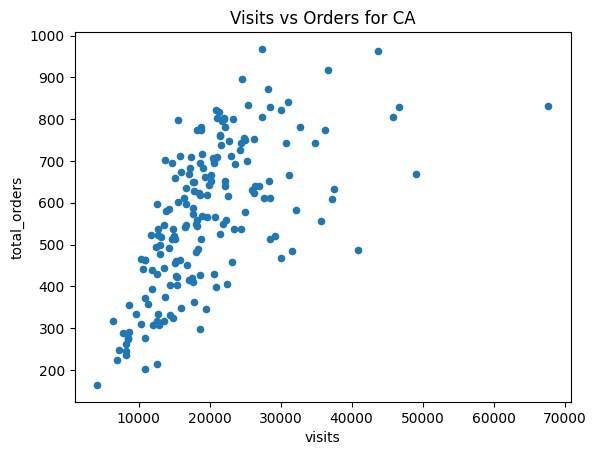

----------------------------------------------------------------------------------------------------


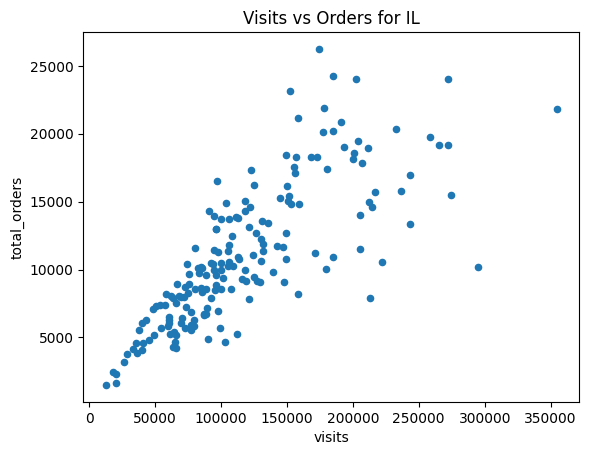

----------------------------------------------------------------------------------------------------


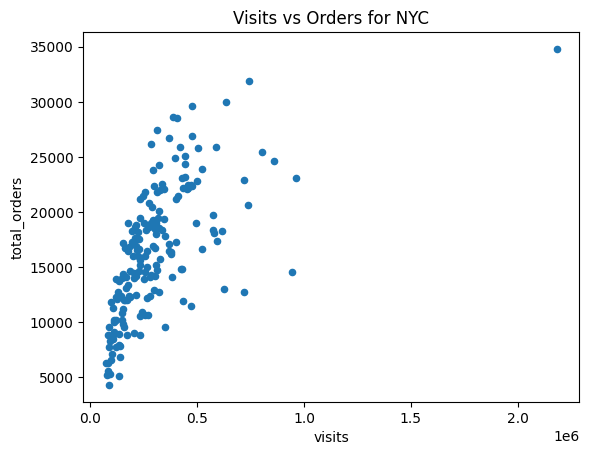

----------------------------------------------------------------------------------------------------


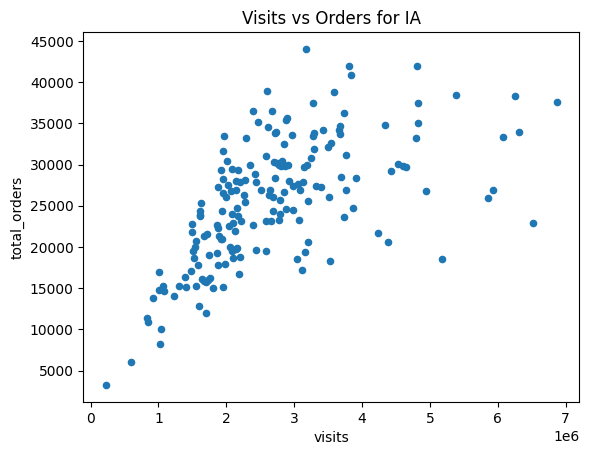

----------------------------------------------------------------------------------------------------


In [ ]:
for state in state_list:
    df.query('state == @state ').plot(kind = "scatter", x = "visits", y = "total_orders", title = f"Visits vs Orders for {state}", legend = False)
    plt.show() # this ensures that the output is in sequence
    print("-"*100)

In [ ]:
# fig, axs = plt.subplots(1, len(state_list), figsize=(15, 5), sharey=True)

# for i, state in enumerate(state_list):
#     ax = axs[i]
#     df.query('state == @state').plot(kind="line", x="date", y="total_orders", title="Orders for " + state, legend=False, ax=ax)
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Total Orders')

# plt.tight_layout()
# plt.show()

### Correlation Analysis

In [ ]:
corr = df.corr(numeric_only= True)
corr

,total_orders,revenue,visits
total_orders,1.00,0.85,0.74
revenue,0.85,1.00,0.88
visits,0.74,0.88,1.00


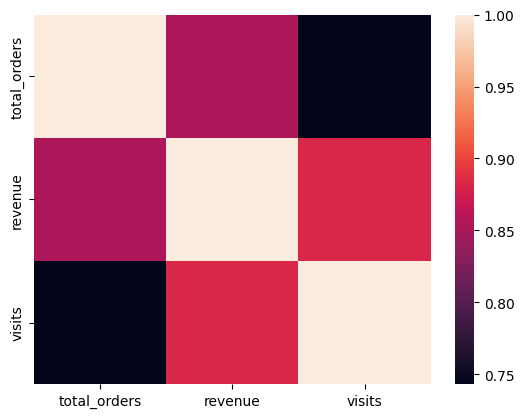

In [ ]:
sns.heatmap(corr);

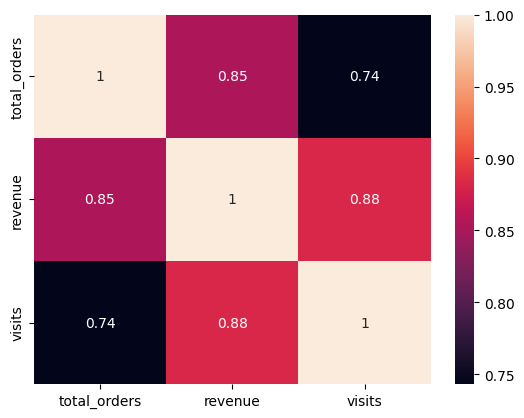

In [ ]:
sns.heatmap(corr, annot = True);

## How do we decide?

We would require some metrics (KPIs) which will allow us to compare across the state and understand the performance of each.

Some of the obvious one is the revenue and orders, but we can add more to further understand and compare the performance of the markets

* Revenue/Order or Average Order Value
* Revenue/Visits

In [ ]:
df['aov'] = df['revenue']/ df['total_orders']
df['revenue_per_visit'] =  df['revenue']/ df['visits']

In [ ]:
df.sample(8) # use sample vs head or tail

,date,state,total_orders,revenue,visits,aov,revenue_per_visit
43,2014-02-13,CA,276,6963.48,10870,25.23,0.64
171,2014-06-21,CA,754,19023.42,24865,25.23,0.77
264,2014-03-25,IL,8940,197663.40,75478,22.11,2.62
168,2014-06-18,CA,751,18947.73,25030,25.23,0.76
529,2014-06-17,NYC,29594,5759584.28,474290,194.62,12.14
618,2014-03-17,IA,19482,5506002.84,1515455,282.62,3.63
367,2014-01-06,NYC,14482,472402.84,202431,32.62,2.33
100,2014-04-11,CA,829,20915.67,46716,25.23,0.45


**Overall Summary**

In [ ]:
df[['aov', 'revenue_per_visit']].agg(["mean", "median", "std"])

,aov,revenue_per_visit
mean,115.65,3.32
median,26.43,2.40
std,117.88,3.12


**State wise summary**

In [ ]:
df.groupby('state')[['aov', 'revenue_per_visit']].agg(["mean", "median", "std"])

aov              revenue_per_visit            
        mean median   std              mean median  std
state                                                  
CA     25.23  25.23  0.00              0.77   0.78 0.21
IA    297.62 297.62 52.39              3.07   3.03 1.05
IL     22.11  22.11  0.00              2.20   2.20 0.59
NYC   117.62 117.62 52.39              7.23   6.83 3.79

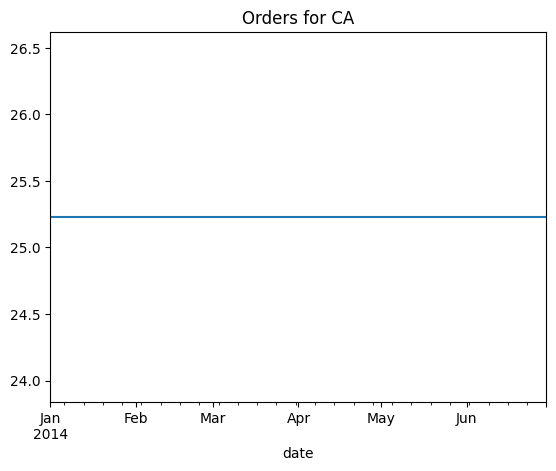

----------------------------------------------------------------------------------------------------


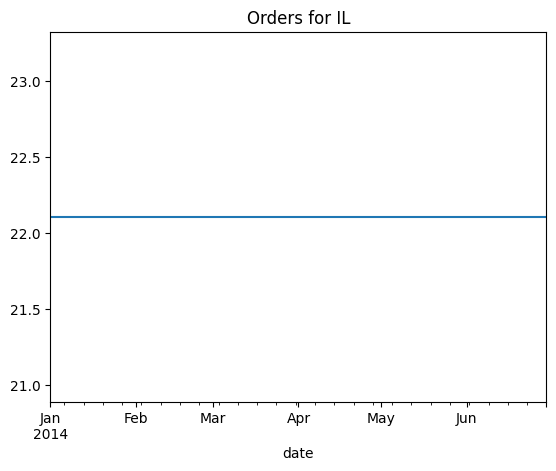

----------------------------------------------------------------------------------------------------


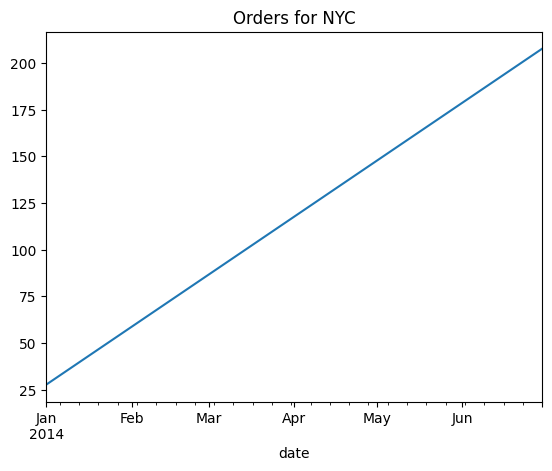

----------------------------------------------------------------------------------------------------


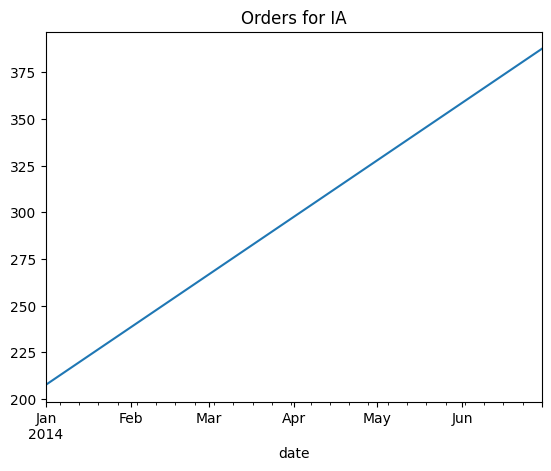

----------------------------------------------------------------------------------------------------


In [ ]:
for state in state_list:
    df.query('state == @state ').plot(kind = "line", x = "date", y = "aov", title = "Orders for " + state, legend = False)
    plt.show() # this ensures that the output is in sequence
    print("-"*100)

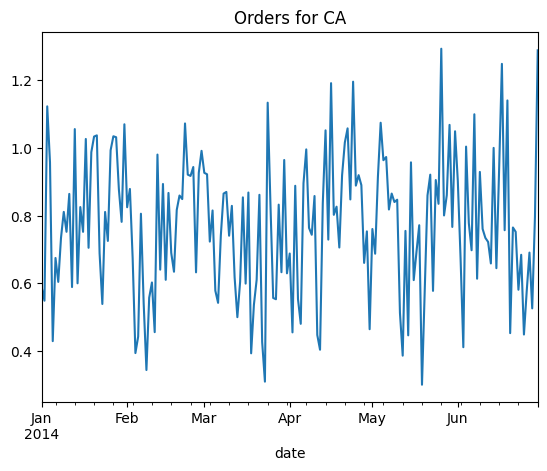

----------------------------------------------------------------------------------------------------


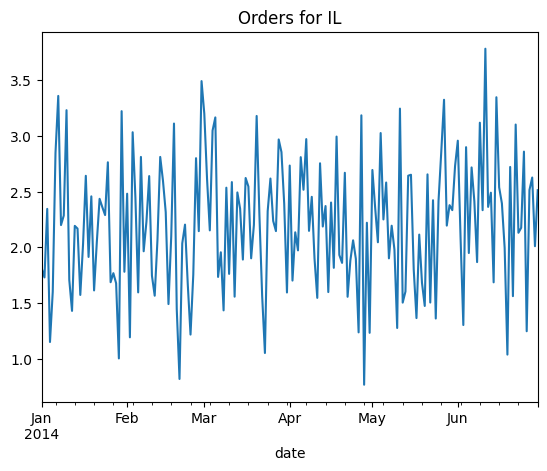

----------------------------------------------------------------------------------------------------


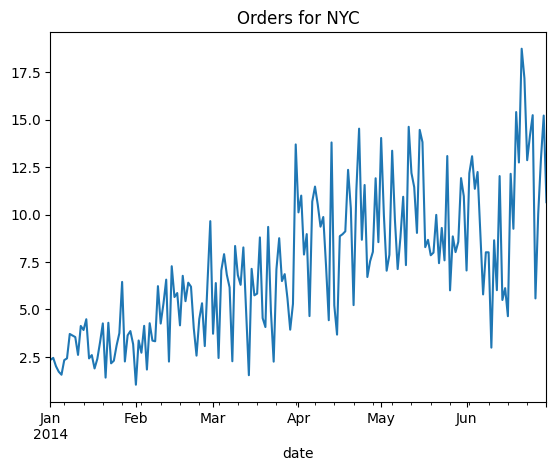

----------------------------------------------------------------------------------------------------


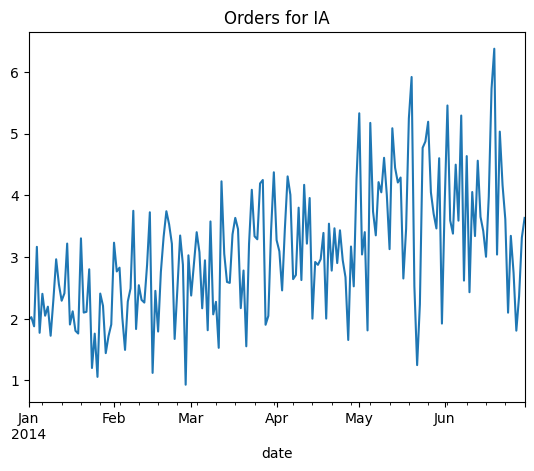

----------------------------------------------------------------------------------------------------


In [ ]:
for state in state_list:
    df.query('state == @state ').plot(kind = "line", x = "date", y = "revenue_per_visit", title = "Orders for " + state, legend = False)
    plt.show() # this ensures that the output is in sequence
    print("-"*100)

### Aggregation at Week/ Month Level

In [ ]:
df['week'] = df['date'].dt.isocalendar().week

In [ ]:
df['month'] = df['date'].dt.month

In [ ]:
df.head()

,date,state,total_orders,revenue,visits,aov,revenue_per_visit,week,month
0,2014-01-01,CA,411,10369.53,17633,25.23,0.59,1,1
1,2014-01-02,CA,347,8754.81,15949,25.23,0.55,1,1
2,2014-01-03,CA,522,13170.06,11731,25.23,1.12,1,1
3,2014-01-04,CA,635,16021.05,16728,25.23,0.96,1,1
4,2014-01-05,CA,214,5399.22,12570,25.23,0.43,1,1


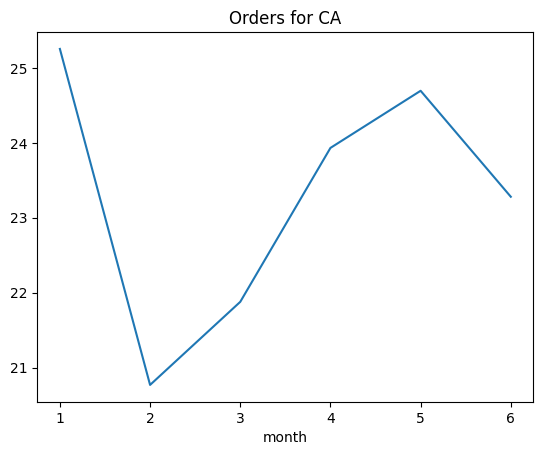

----------------------------------------------------------------------------------------------------


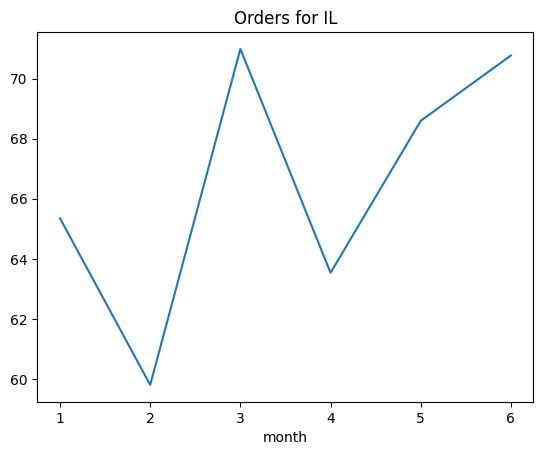

----------------------------------------------------------------------------------------------------


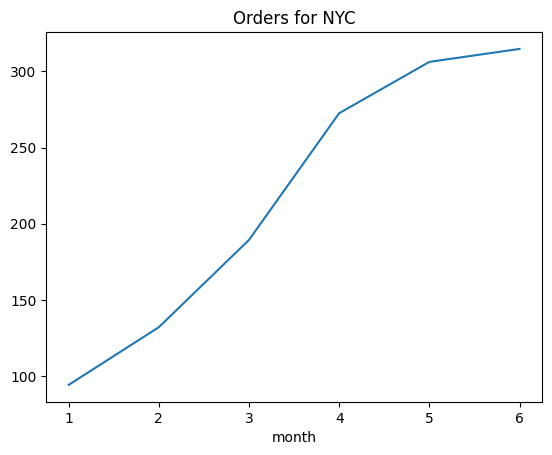

----------------------------------------------------------------------------------------------------


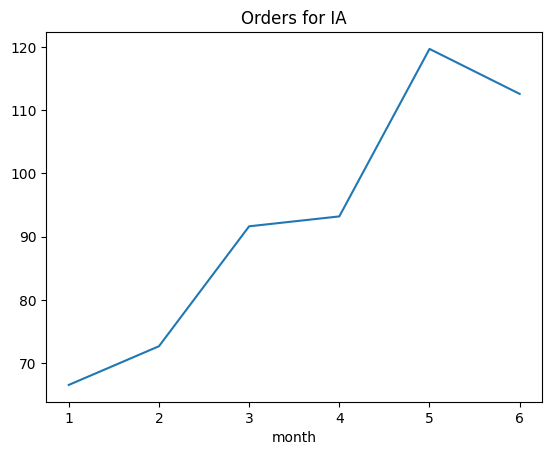

----------------------------------------------------------------------------------------------------


In [ ]:
for state in state_list:
    (df.query('state == @state ')
    .groupby("month", as_index = False)["revenue_per_visit"].sum()
    .plot(kind = "line", x = "month", y = "revenue_per_visit", title = "Orders for " + state, legend = False)
    )
    plt.show() # this ensures that the output is in sequence
    print("-"*100)